In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
## Load the dataset
df=pd.read_csv("C:/Users/HP/Desktop/Data Trained/Mushroom.csv")
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
## Checking shape of dataset
df.shape


(8124, 23)

In [4]:
## Getting the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# Checking Null values 
df.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

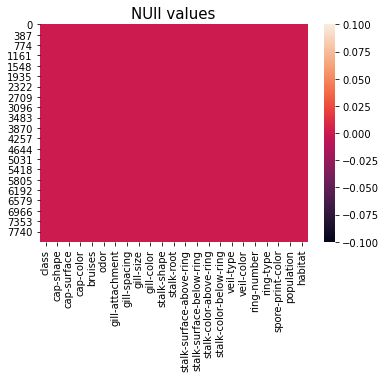

In [6]:

#visualization null values by heatmap
plt.title('NUll values',fontsize=15)
sns.heatmap(df.isnull())
plt.show()

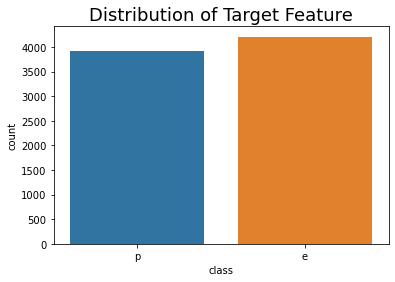

In [7]:

## Distribution of Target Variable 
plt.title('Distribution of Target Feature',fontsize=18)
sns.countplot(df['class'],data=df)
plt.show()

In [8]:
from scipy.stats import kurtosis
#lets define a function to see all kind of statistic data,nan values and IQR also
def stats(df):
    for i in df.columns:#getting All the columns in for Loop
        if df[i].dtypes!='object':# checking the columns Dtypes if it's not in objective then it will go forward→
            k=df[i]#declaring the variable
            cvar=k.mean()/k.std()#Coefficient of variation (CV)
            standard=k.std()#standard deviation
            krts=kurtosis(k)#Kurtosis
            #https://corporatefinanceinstitute.com/resources/knowledge/other/kurtosis/#:~:text=Kurtosis%20is%20a%20statistical%20measure,given%20distribution%20contain%20extreme%20values.
            m=k.mean()#mean
            mad=k.mad()#Median Absolute Deviation (MAD)
            skew=k.skew()#skewness
            variance=k.var()#variance
            Range=k.max()-k.min()#Range
            #Iqr
            Q1 = k.quantile(0.25)
            Q3 = k.quantile(0.75)
            IQR = Q3 - Q1
            des=df[i].describe()
            #making a Dtaa frame with above Data
            st=pd.DataFrame({"standard deviation":[standard],"Coefficient of variation":[cvar],
                             "Kurtosis":[krts],"mean":[m],"Median Absolute Deviation":[mad],
                             "skewness":[skew],"Variance":[variance],"Range":[Range],"IQR":[IQR]})
            print("column Name→→",i)
            print("Dtype=",df[i].dtype)
            print("\n")
            if df[i].skew()>0.55:
                print("This column Have Positive skewd Data")
            if df[i].skew()<-0.55:
                    print("This column Have Negetive skewd Data")
            print("\n")
            print(st)
            sns.set_style("whitegrid")
            sns.distplot(df[i], kde=True)
            plt.plot(skew,color='red',label=skew)
            plt.legend()
            st.plot(kind='bar')
            plt.show()
            print("column Describe")
            print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
            print(des)
            des.plot(kind='bar',color='red')
            plt.xticks(rotation=75)
            plt.show()
            print("\n")
            print("\n")
            print("\n")
        else:
            v=df[i].value_counts()
            print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
            print("Value Counts of column")
            print("\n")
            print(v)
            sns.countplot(x=df[i],data=df)
            print("columns Name→→",i)
            print("Dtype =",df[i].dtype)
            plt.xticks(rotation=75)
            plt.show()
            print("\n")
            print("\n")
            print("\n")
        nan=df[i].isnull().sum()    
        Nan=nan/len(df[i])
        if Nan ==0.0:
            print("No Nan Values Are Present")
            print("\n")
            print("\n")
        else:
            print("NaN Value % → →",Nan)
            print(nan,"    Nan values are present")
            print("\n")
            print("\n")
        print("►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


e    4208
p    3916
Name: class, dtype: int64
columns Name→→ class
Dtype = object


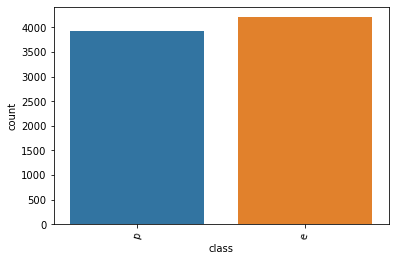







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
columns Name→→ cap-shape
Dtype = object


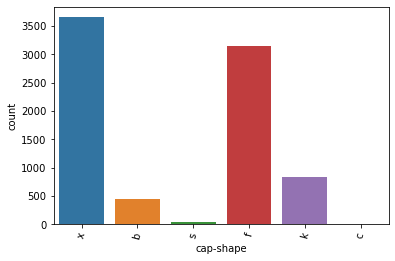







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
columns Name→→ cap-surface
Dtype = object


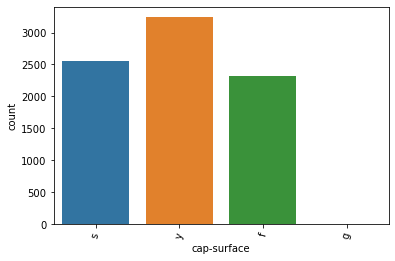







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
columns Name→→ cap-color
Dtype = object


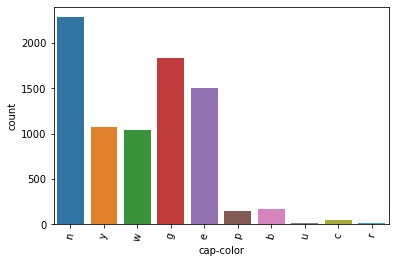







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


f    4748
t    3376
Name: bruises, dtype: int64
columns Name→→ bruises
Dtype = object


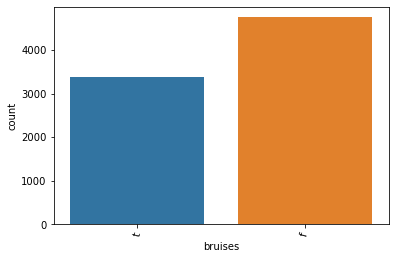







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
columns Name→→ odor
Dtype = object


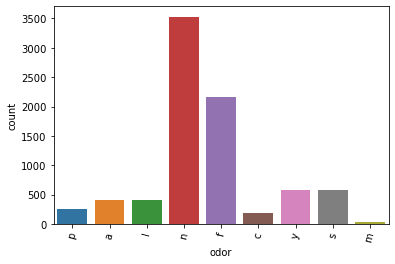







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


f    7914
a     210
Name: gill-attachment, dtype: int64
columns Name→→ gill-attachment
Dtype = object


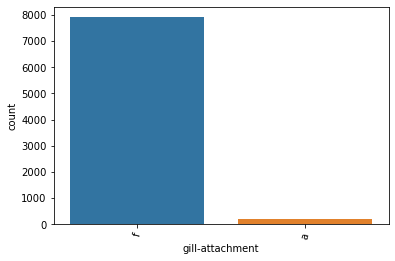







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


c    6812
w    1312
Name: gill-spacing, dtype: int64
columns Name→→ gill-spacing
Dtype = object


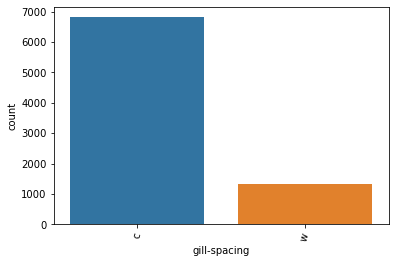







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


b    5612
n    2512
Name: gill-size, dtype: int64
columns Name→→ gill-size
Dtype = object


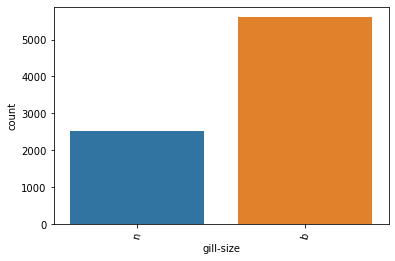







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
columns Name→→ gill-color
Dtype = object


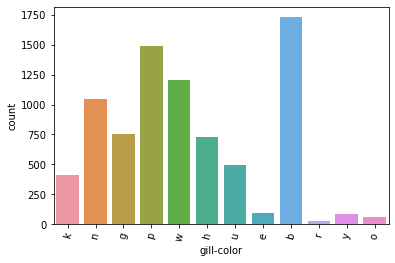







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


t    4608
e    3516
Name: stalk-shape, dtype: int64
columns Name→→ stalk-shape
Dtype = object


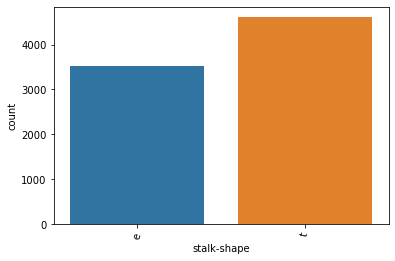







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
columns Name→→ stalk-root
Dtype = object


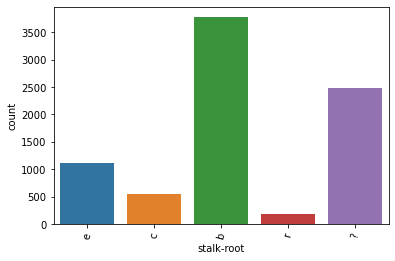







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64
columns Name→→ stalk-surface-above-ring
Dtype = object


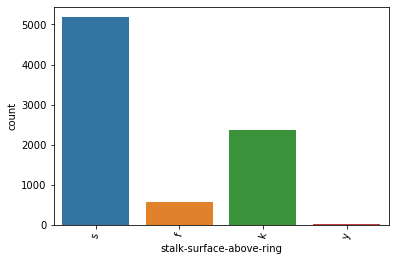







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


s    4936
k    2304
f     600
y     284
Name: stalk-surface-below-ring, dtype: int64
columns Name→→ stalk-surface-below-ring
Dtype = object


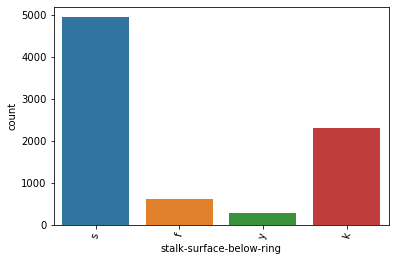







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: stalk-color-above-ring, dtype: int64
columns Name→→ stalk-color-above-ring
Dtype = object


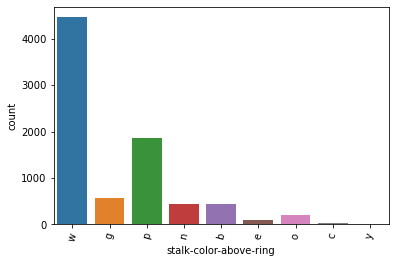







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: stalk-color-below-ring, dtype: int64
columns Name→→ stalk-color-below-ring
Dtype = object


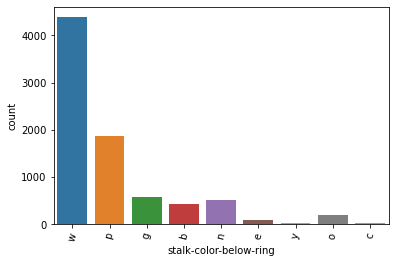







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


p    8124
Name: veil-type, dtype: int64
columns Name→→ veil-type
Dtype = object


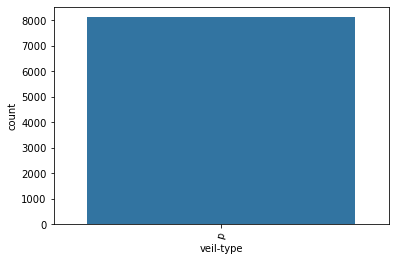







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


w    7924
n      96
o      96
y       8
Name: veil-color, dtype: int64
columns Name→→ veil-color
Dtype = object


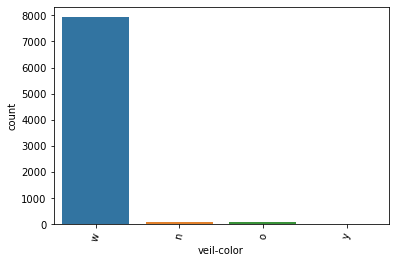







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


o    7488
t     600
n      36
Name: ring-number, dtype: int64
columns Name→→ ring-number
Dtype = object


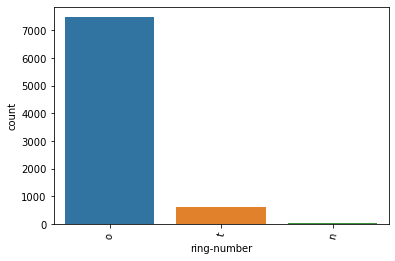







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64
columns Name→→ ring-type
Dtype = object


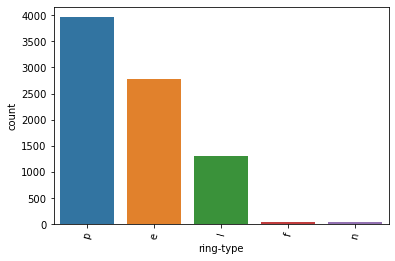







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


w    2388
n    1968
k    1872
h    1632
r      72
b      48
u      48
y      48
o      48
Name: spore-print-color, dtype: int64
columns Name→→ spore-print-color
Dtype = object


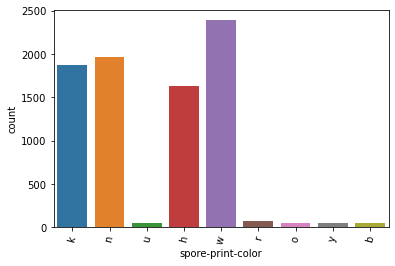







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64
columns Name→→ population
Dtype = object


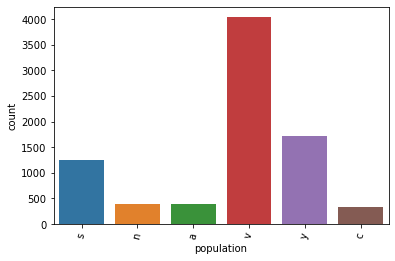







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Value Counts of column


d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64
columns Name→→ habitat
Dtype = object


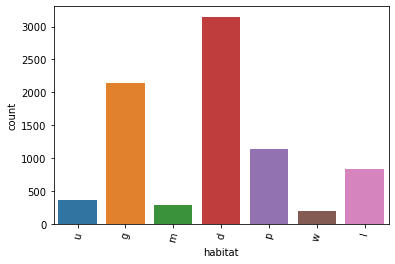







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


In [9]:
stats(df)

In [10]:

## Chaging '?' category with Unknown category
df.replace('?','Unknown',inplace=True)

In [11]:

## category has been changed
df['stalk-root'].value_counts(normalize=True)


b          0.464796
Unknown    0.305268
e          0.137863
c          0.068439
r          0.023634
Name: stalk-root, dtype: float64

In [12]:
df['class']=df['class'].replace({"e":0,"p":1})

# Univariant Anlysis

In [13]:
def count(i):
    sns.set_style("whitegrid")
    c=df[i].value_counts()
    sns.countplot(x=i,data=df)
    plt.plot(c,color='red',label=c)
    plt.xlabel(i)
    plt.ylabel("count")
    plt.legend()
    plt.title(i,{"fontsize":25})
    print(c)
    plt.show()

0    4208
1    3916
Name: class, dtype: int64


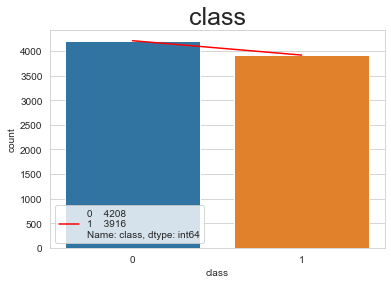

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


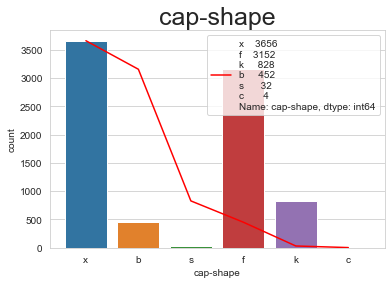

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64


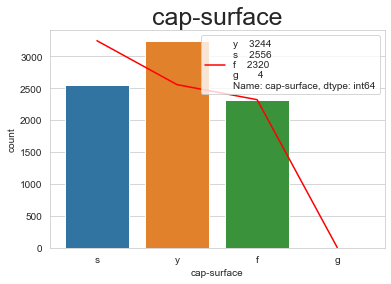

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64


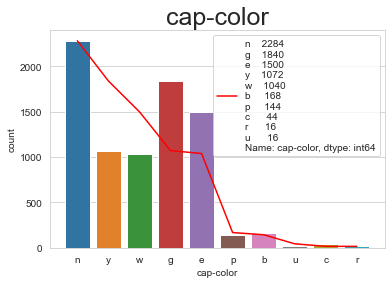

f    4748
t    3376
Name: bruises, dtype: int64


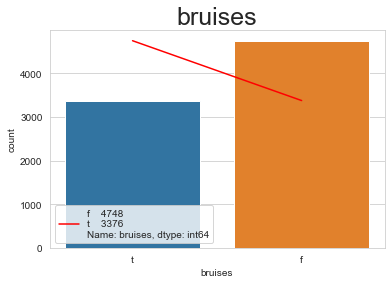

n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64


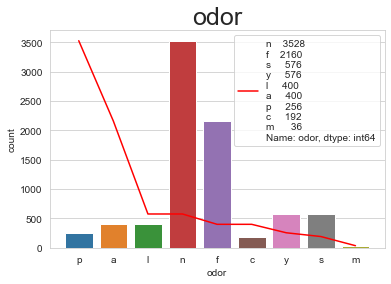

f    7914
a     210
Name: gill-attachment, dtype: int64


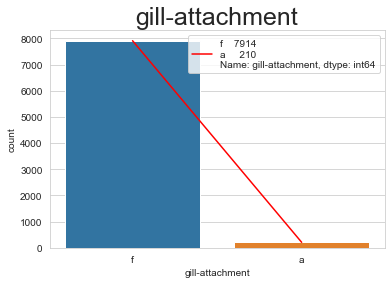

c    6812
w    1312
Name: gill-spacing, dtype: int64


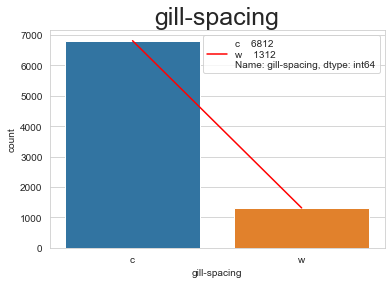

b    5612
n    2512
Name: gill-size, dtype: int64


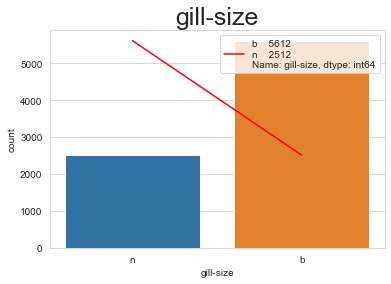

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64


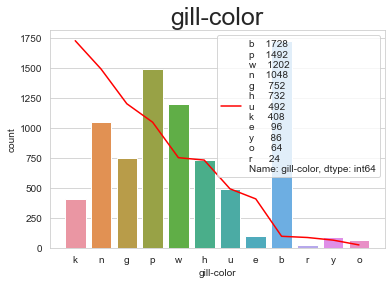

t    4608
e    3516
Name: stalk-shape, dtype: int64


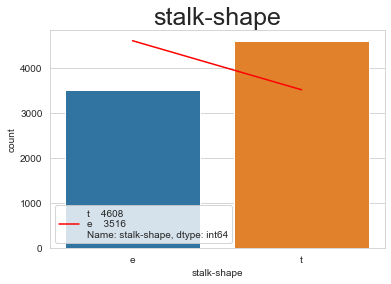

b          3776
Unknown    2480
e          1120
c           556
r           192
Name: stalk-root, dtype: int64


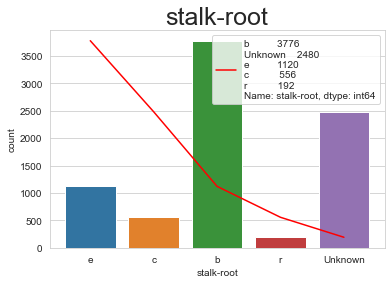

s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64


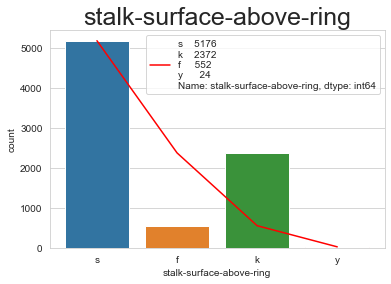

s    4936
k    2304
f     600
y     284
Name: stalk-surface-below-ring, dtype: int64


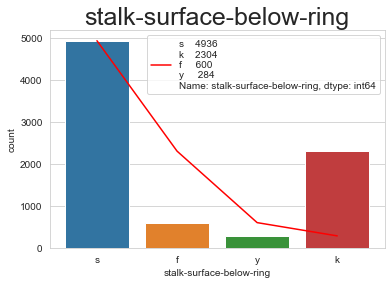

w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: stalk-color-above-ring, dtype: int64


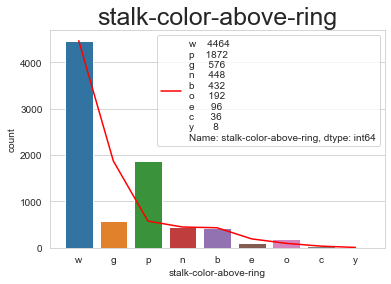

w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: stalk-color-below-ring, dtype: int64


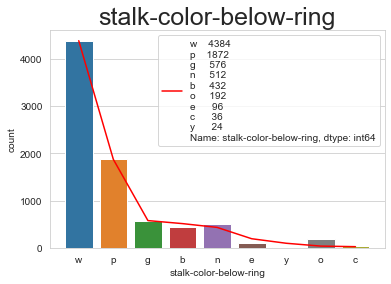

p    8124
Name: veil-type, dtype: int64


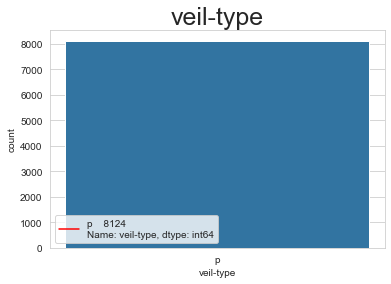

w    7924
n      96
o      96
y       8
Name: veil-color, dtype: int64


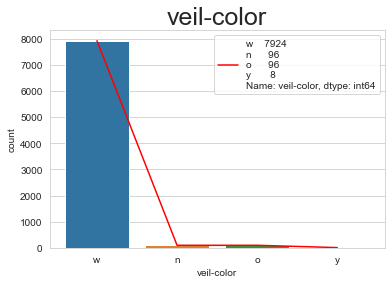

o    7488
t     600
n      36
Name: ring-number, dtype: int64


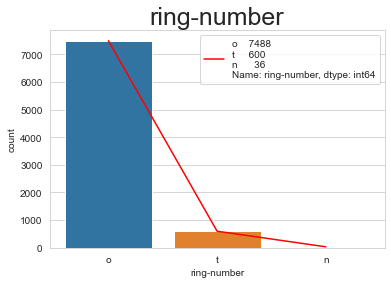

p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64


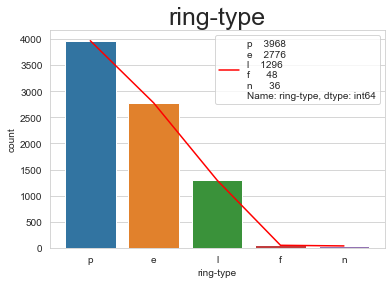

w    2388
n    1968
k    1872
h    1632
r      72
b      48
u      48
y      48
o      48
Name: spore-print-color, dtype: int64


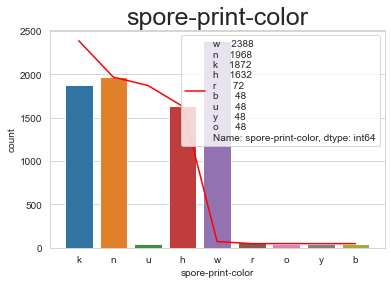

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64


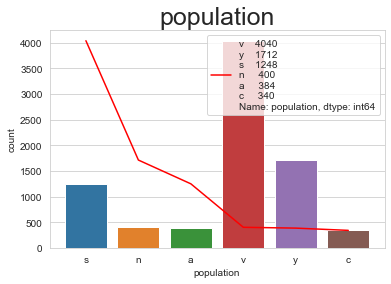

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64


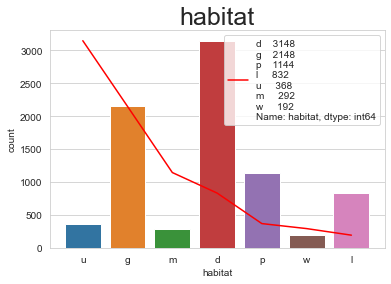

In [14]:
for i in df.columns:
    count(i)

# Baivariant Analysis

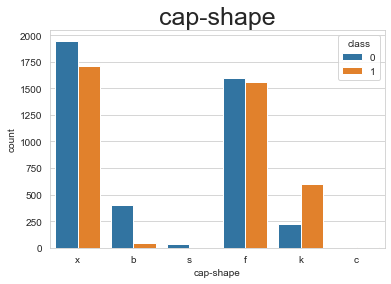

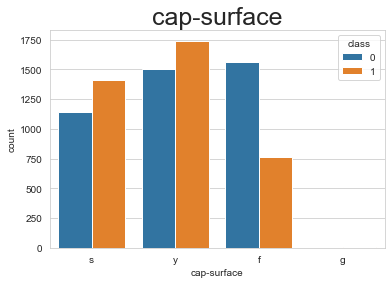

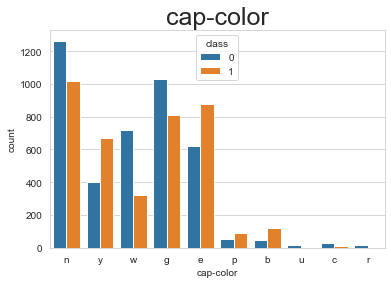

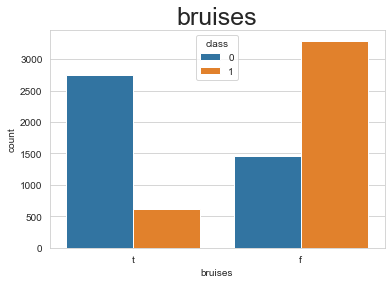

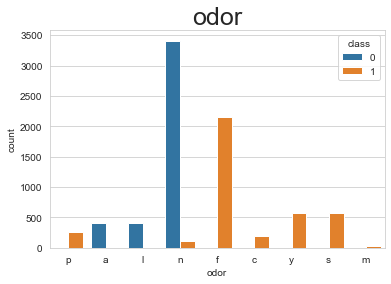

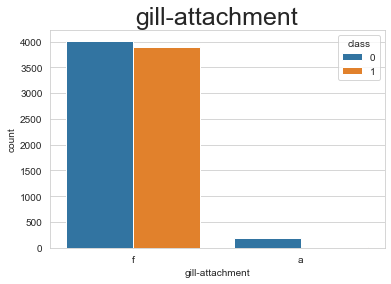

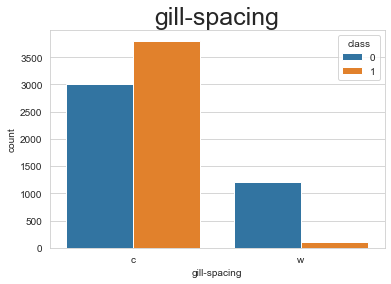

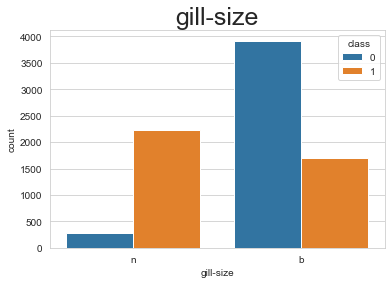

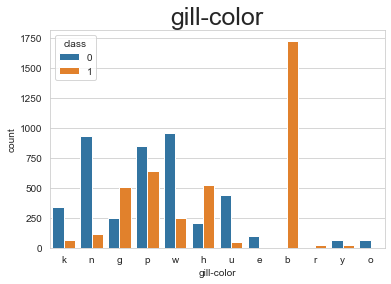

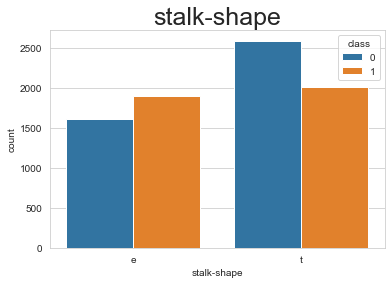

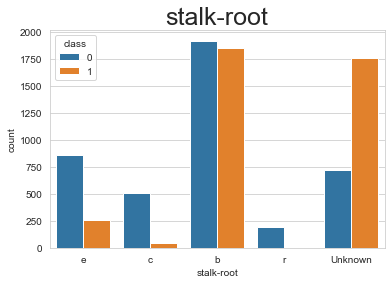

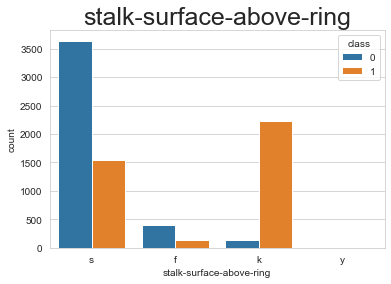

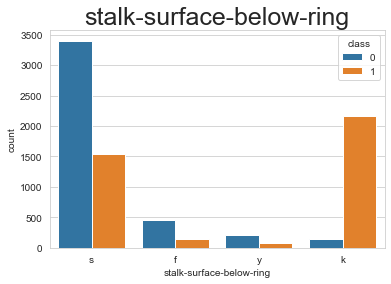

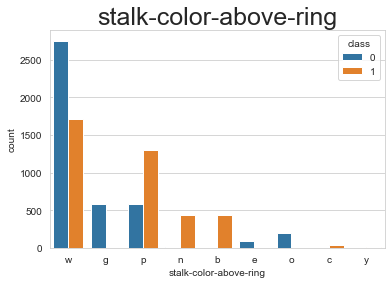

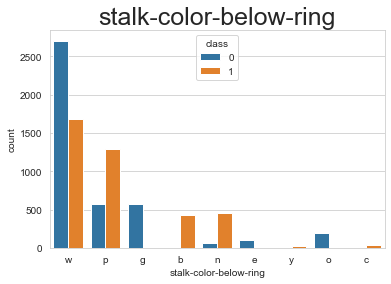

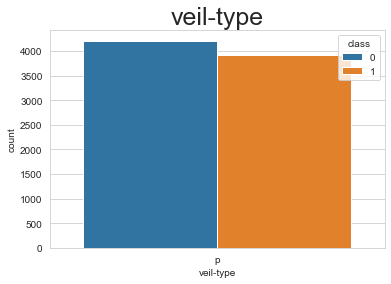

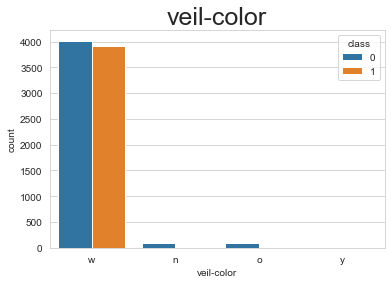

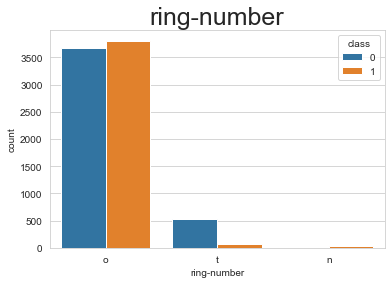

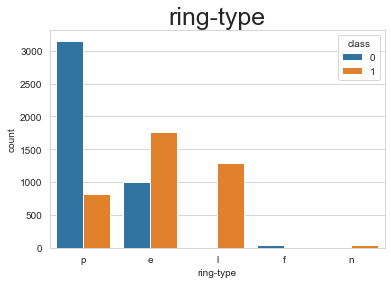

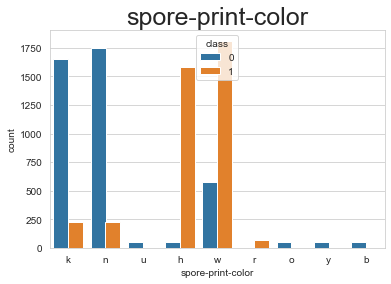

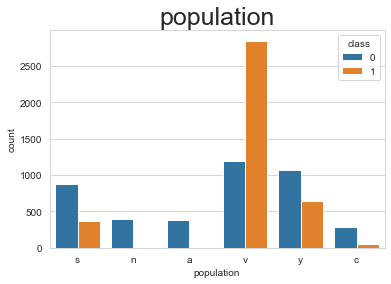

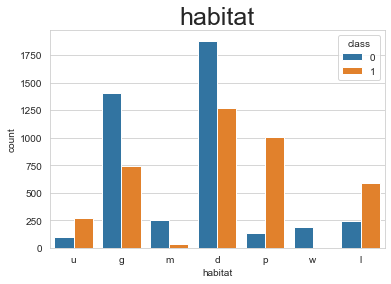

In [15]:
col=df.drop('class',axis=1)
def cnt(i):
    sns.countplot(x=i,hue='class',data=df)
    plt.title(i,{"fontsize":25})
    plt.show()

    
for i in col.columns:
    cnt(i)

# Data Pre Processing

In [16]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])

# Multi Variant Aalysis

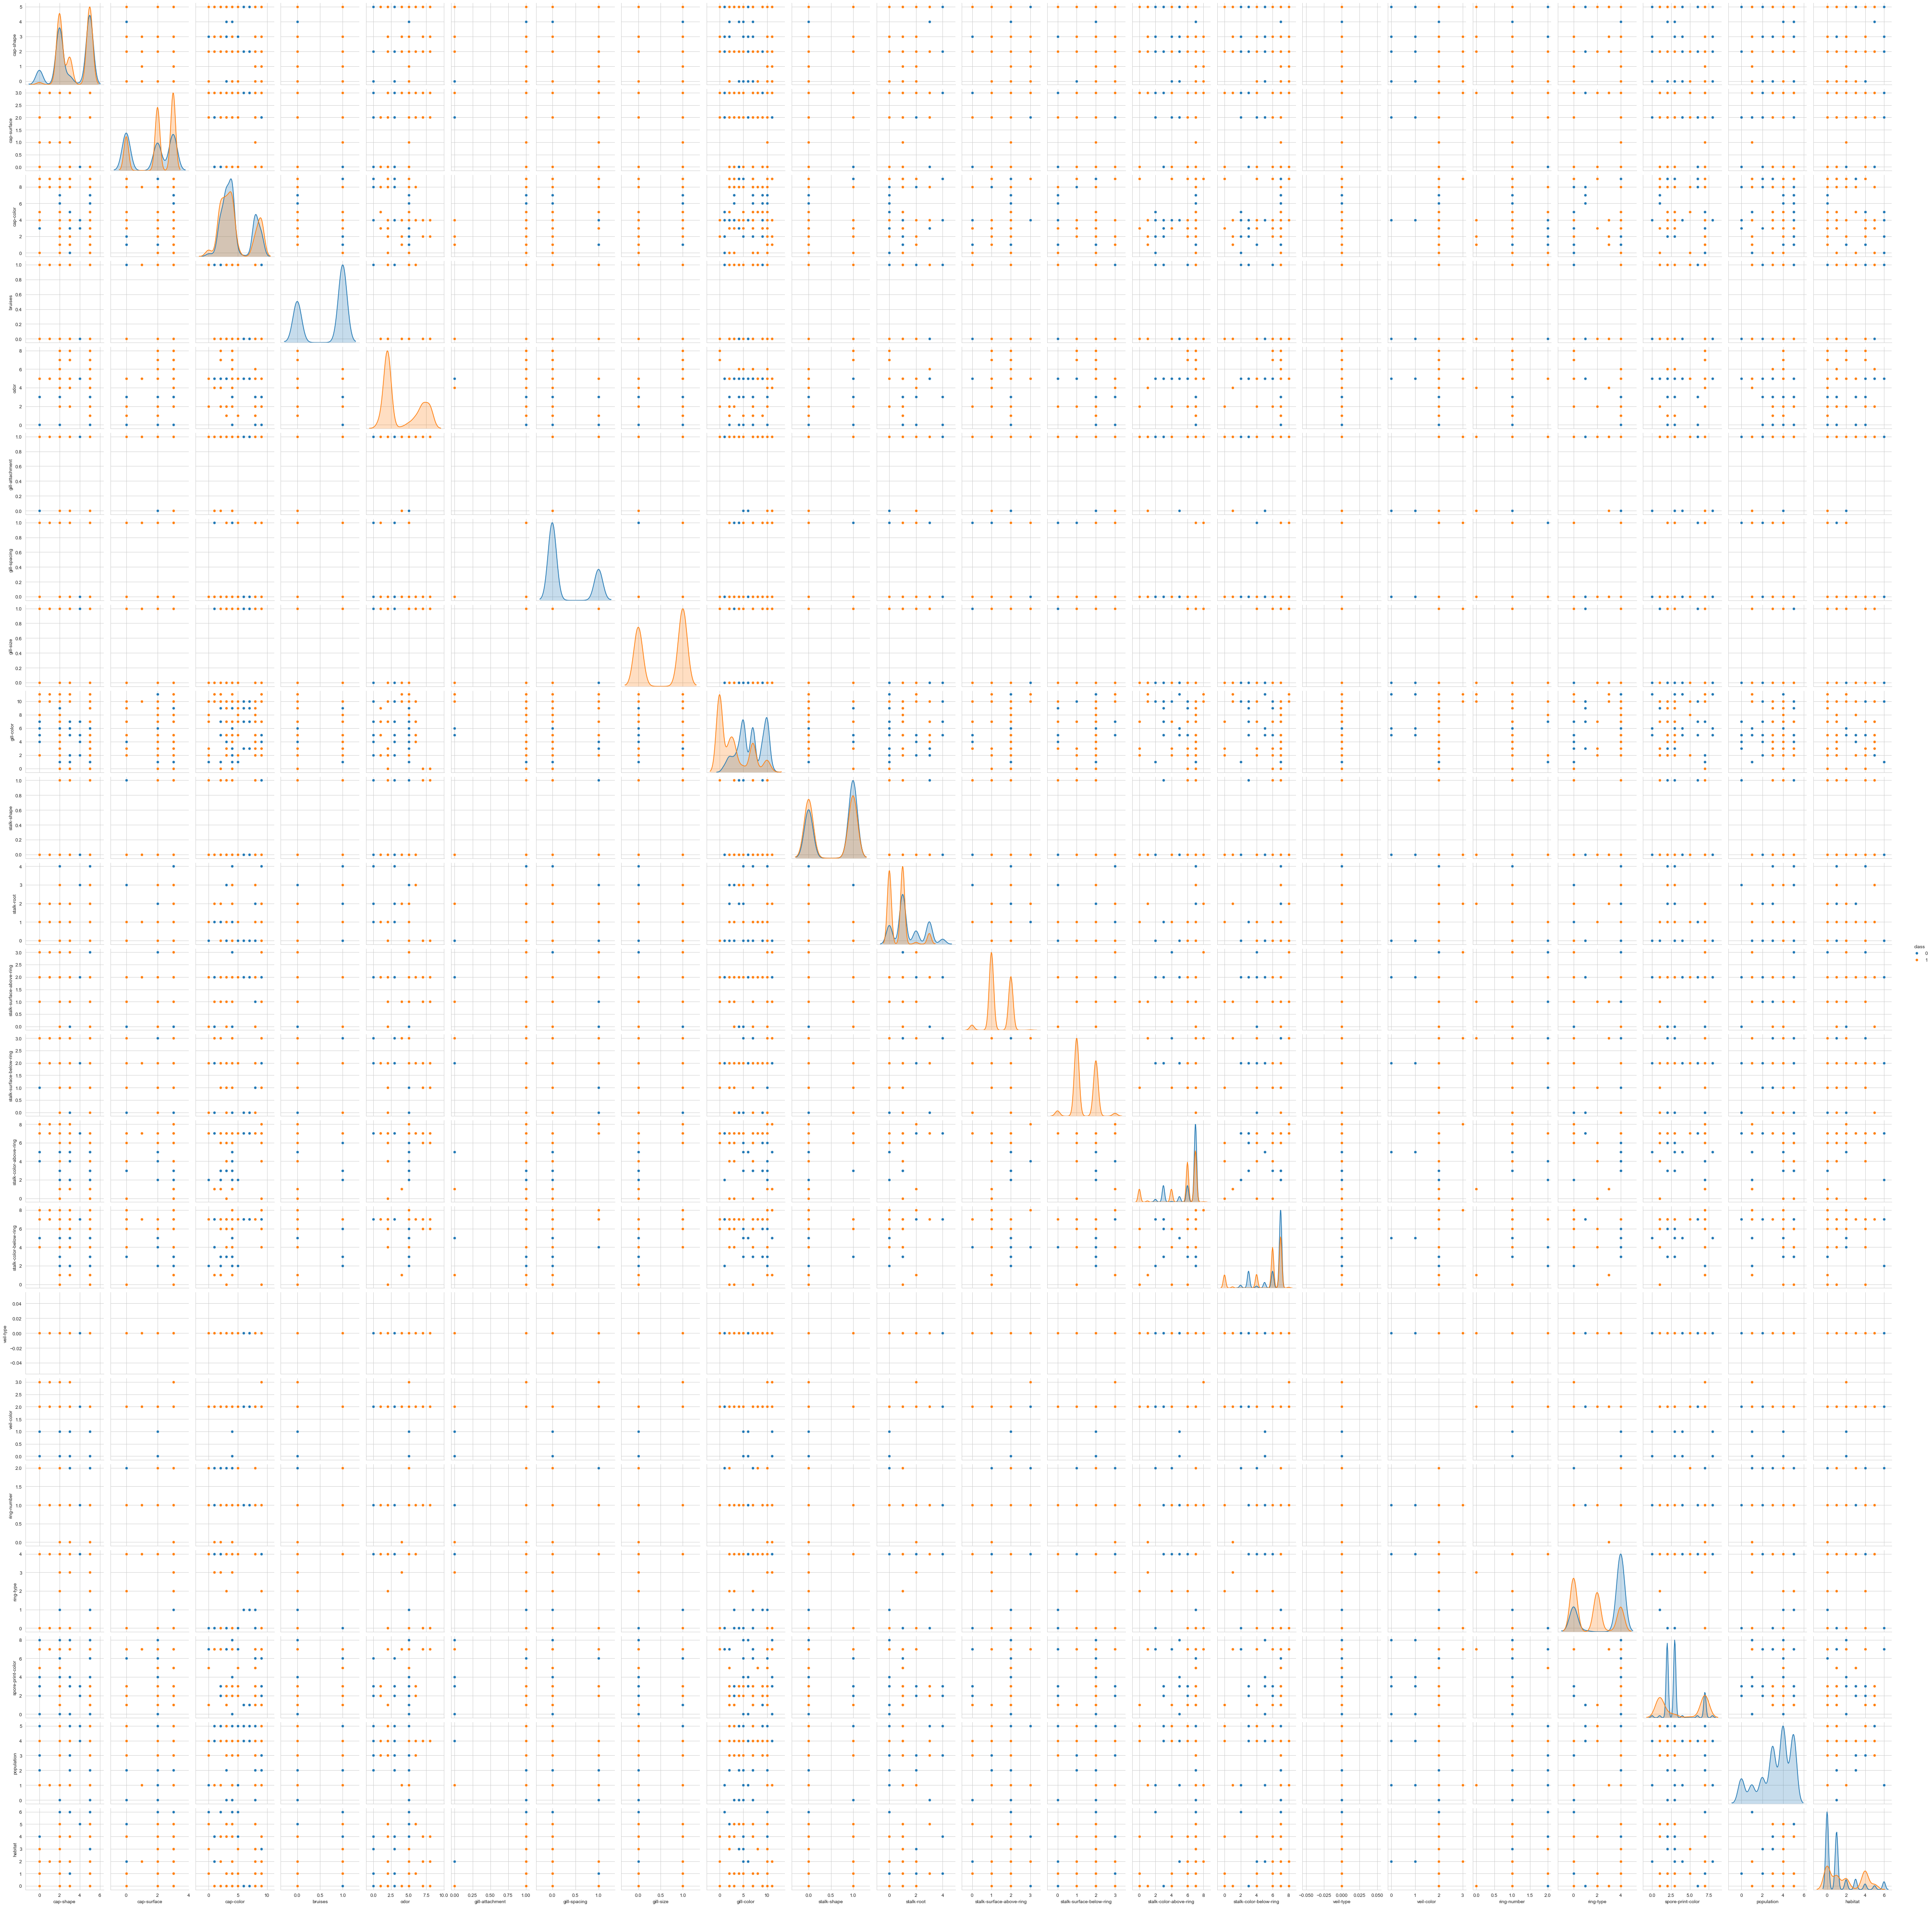

In [17]:
sns.pairplot(df,hue='class')

# Assigning X and Y variable

In [18]:
#segregation between x and y
x=df.drop(['class'],axis=1)
y=df[['class']]

In [19]:
print(x.shape,y.shape)

(8124, 22) (8124, 1)


# Principal Component Analysis (PCA)

In [20]:
from sklearn.decomposition import PCA
cover_matrix=PCA(n_components=len(x.columns))
cover_matrix.fit(x)

PCA(n_components=22)

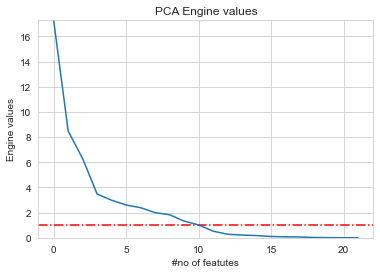

In [21]:
plt.ylabel("Engine values")
plt.xlabel("#no of featutes")
plt.title("PCA Engine values")
plt.ylim(0,max(cover_matrix.explained_variance_))
plt.axhline(y=1,color='r',linestyle='-.')
plt.plot(cover_matrix.explained_variance_)
plt.show()

In [22]:
pc=PCA(n_components=10)
x1=pc.fit_transform(x)
x=pd.DataFrame(x1)

# Model Creation¶

In [23]:
#In this data set we know that out target variable class is catagorical so we are going to take Logistic regresson
#We will use f1 score as the metrics as it is balanced dataset problem
#Maximum f1 score in between random states 42 to 100
#lets make a function for getting the best random_satae for a model toget better f1_ score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,f1_score
from sklearn.model_selection import train_test_split
f1_acc=[]
f_rstate=[]
rgr_n=[]
def max_acc(rgr,x,y):
    max_acc=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20,stratify=y)
        rgr.fit(x_train,y_train)
        y_prd=rgr.predict(x_test)
        rc=f1_score(y_test,y_prd)
        print("F1 score ",rc,"coresponding to ",r)
        if rc>max_acc:
            max_acc=rc
            final_r=r
    f1_acc.append(max_acc)
    f_rstate.append(final_r)
    rgr_n.append(input(""))
    print("max F1_ score coressponding to ♣♣→",final_r,"is♣♣",max_acc*100)

In [24]:
#lets make a function for cross_val_score
from sklearn.model_selection import cross_val_score  
cvss=[]
def k(model,x,y):
    c=cross_val_score(model,x,y,cv=5,scoring="f1")
    print("f1 score for ",model,c.mean())
    print("Standard deviation  in f1_score for ",model,c.std())
    print()
    print("******************************************************")
    print("After seen the cross validation score of",model,"the cross_val_score  mean is",c.mean())
    cvss.append(c.mean())

In [25]:
Roc_Auc=[]
def PLT(md,x,y,rd):#md=model ,x=indipendent variable,y=label,rd=random_state which one give the best accuracy 
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20,stratify=y)
    md.fit(x_train,y_train)
    pre=md.predict(x_test)
    acc=f1_score(y_test,pre)
    print(acc)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    Roc_Auc.append(roc_auc)
    print ('roc_auc_score = ',roc_auc)
    cm=confusion_matrix(y_test,pre)
    print(cm)
    sns.heatmap(cm,annot=True,cmap='rainbow',cbar=False)
    print()
    cr=classification_report(y_test,pre)
    print()
    print()
    print()
    plt.figure(figsize=[20,50],facecolor='purple')
    plt.subplot(912)
    plt.title(md,{"fontsize":22})
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print(cr,"\n","☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼")

In [26]:
trn_scr=[]
#inthis we will find the Train_loss 
def train_loss(rgr,x,y,rd):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20,stratify=y)
    rgr.fit(x_train,y_train)
    scr=rgr.score(x_train,y_train)
    trn_loss=1-scr
    trn_scr.append(trn_loss)
    print(trn_loss)

In [27]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_acc(lg,x,y)

F1 score  0.8105610561056106 coresponding to  42
F1 score  0.8029004614370469 coresponding to  43
F1 score  0.8033964728935334 coresponding to  44
F1 score  0.8026402640264027 coresponding to  45
F1 score  0.825147347740668 coresponding to  46
F1 score  0.8144329896907216 coresponding to  47
F1 score  0.8334430546412113 coresponding to  48
F1 score  0.8094302554027505 coresponding to  49
F1 score  0.8321167883211679 coresponding to  50
F1 score  0.8062827225130891 coresponding to  51
F1 score  0.8187290969899667 coresponding to  52
F1 score  0.8034414295168762 coresponding to  53
F1 score  0.8058510638297872 coresponding to  54
F1 score  0.8242264647794602 coresponding to  55
F1 score  0.8180013236267373 coresponding to  56
F1 score  0.8161073825503355 coresponding to  57
F1 score  0.8081740276862227 coresponding to  58
F1 score  0.8239116309291747 coresponding to  59
F1 score  0.8096795291039895 coresponding to  60
F1 score  0.817824377457405 coresponding to  61
F1 score  0.8090185676

In [28]:
#lets  check cross_val_score of the model
k(lg,x,y)

f1 score for  LogisticRegression() 0.7128495610109098
Standard deviation  in f1_score for  LogisticRegression() 0.11775054083082945

******************************************************
After seen the cross validation score of LogisticRegression() the cross_val_score  mean is 0.7128495610109098


0.8334430546412113
roc_auc_score =  0.8430506639000374
[[739 103]
 [150 633]]






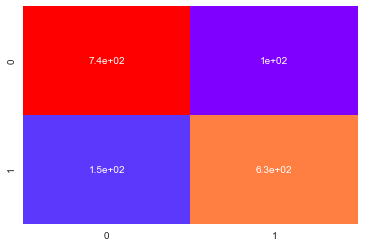

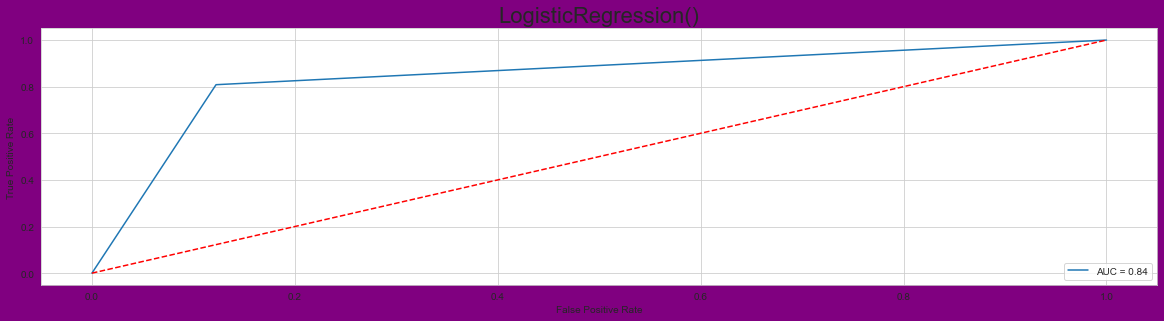

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       842
           1       0.86      0.81      0.83       783

    accuracy                           0.84      1625
   macro avg       0.85      0.84      0.84      1625
weighted avg       0.85      0.84      0.84      1625
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [29]:
PLT(lg,x,y,48 )

In [30]:
train_loss(lg,x,y,48)

0.17910447761194026


# KNeighborsClassifier

In [31]:
from sklearn.model_selection import *
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={"n_jobs":range(1,30,2),"n_neighbors":range(0,50,3),"leaf_size":range(30,70,5)}
Gk=GridSearchCV(kn,parameters,cv=5,scoring="f1")
Gk.fit(x,y)
Gk.best_params_#finding the best hyperparameter with Gridsearchcv

{'leaf_size': 30, 'n_jobs': 1, 'n_neighbors': 3}

In [32]:
knn=KNeighborsClassifier(n_jobs=1,n_neighbors=3,leaf_size=30)
max_acc(knn,x,y)

F1 score  0.9948914431673053 coresponding to  42
F1 score  0.9955328653477983 coresponding to  43
F1 score  0.9968051118210861 coresponding to  44
F1 score  0.9974489795918366 coresponding to  45
F1 score  0.9968091895341417 coresponding to  46
F1 score  0.9955214331413946 coresponding to  47
F1 score  0.9961636828644502 coresponding to  48
F1 score  0.9942418426103647 coresponding to  49
F1 score  0.9974522292993631 coresponding to  50
F1 score  0.9961685823754789 coresponding to  51
F1 score  0.996173469387755 coresponding to  52
F1 score  0.9948914431673053 coresponding to  53
F1 score  0.9955156950672646 coresponding to  54
F1 score  0.9955328653477983 coresponding to  55
F1 score  0.9935979513444302 coresponding to  56
F1 score  0.9961587708066583 coresponding to  57
F1 score  0.9923273657289002 coresponding to  58
F1 score  0.9948717948717949 coresponding to  59
F1 score  0.9917038927887684 coresponding to  60
F1 score  0.9974489795918366 coresponding to  61
F1 score  0.996801023

In [33]:
#lets  check cross_val_score of the model
k(knn,x,y)

f1 score for  KNeighborsClassifier(n_jobs=1, n_neighbors=3) 0.8783215349631888
Standard deviation  in f1_score for  KNeighborsClassifier(n_jobs=1, n_neighbors=3) 0.11062767876594584

******************************************************
After seen the cross validation score of KNeighborsClassifier(n_jobs=1, n_neighbors=3) the cross_val_score  mean is 0.8783215349631888


0.9987228607918263
roc_auc_score =  0.9987676061678846
[[841   1]
 [  1 782]]






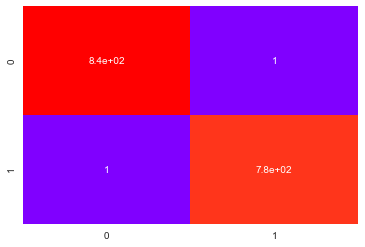

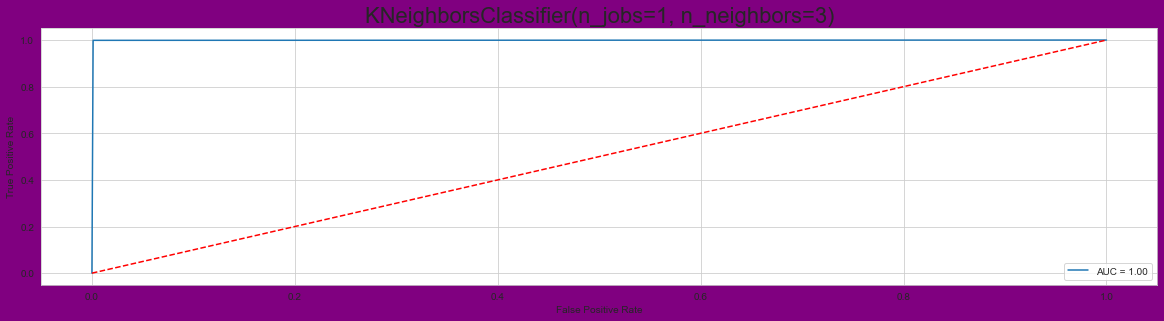

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [34]:
PLT(knn,x,y,82)

In [35]:
train_loss(knn,x,y,82)

0.0010770887828897013


In [36]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
parameters={"criterion":["gini", "entropy"],"max_depth":range(2,10,1),"min_samples_leaf":range(1,10,2)}
grd=GridSearchCV(dc,parameters,cv=5,scoring="f1")
grd.fit(x,y)
grd.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1}

In [37]:
Dc=DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=1)
max_acc(Dc,x,y)

F1 score  0.9813023855577047 coresponding to  42
F1 score  0.9847133757961782 coresponding to  43
F1 score  0.9878438899552143 coresponding to  44
F1 score  0.9853222718570518 coresponding to  45
F1 score  0.9904761904761905 coresponding to  46
F1 score  0.9808429118773946 coresponding to  47
F1 score  0.9904153354632587 coresponding to  48
F1 score  0.9897435897435898 coresponding to  49
F1 score  0.9865985960433951 coresponding to  50
F1 score  0.9866666666666667 coresponding to  51
F1 score  0.9878438899552143 coresponding to  52
F1 score  0.9872286079182631 coresponding to  53
F1 score  0.9827255278310941 coresponding to  54
F1 score  0.9872286079182631 coresponding to  55
F1 score  0.9910828025477707 coresponding to  56
F1 score  0.9859514687100894 coresponding to  57
F1 score  0.9852658552210122 coresponding to  58
F1 score  0.9852658552210122 coresponding to  59
F1 score  0.9846938775510204 coresponding to  60
F1 score  0.9885496183206107 coresponding to  61
F1 score  0.97943444

In [38]:
#lets  check cross_val_score of the model
k(Dc,x,y)

f1 score for  DecisionTreeClassifier(max_depth=9) 0.8915401332868506
Standard deviation  in f1_score for  DecisionTreeClassifier(max_depth=9) 0.10546644638793251

******************************************************
After seen the cross validation score of DecisionTreeClassifier(max_depth=9) the cross_val_score  mean is 0.8915401332868506


0.9916932907348243
roc_auc_score =  0.991967067403221
[[836   6]
 [  7 776]]






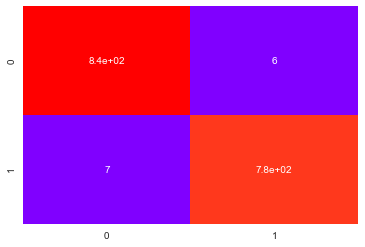

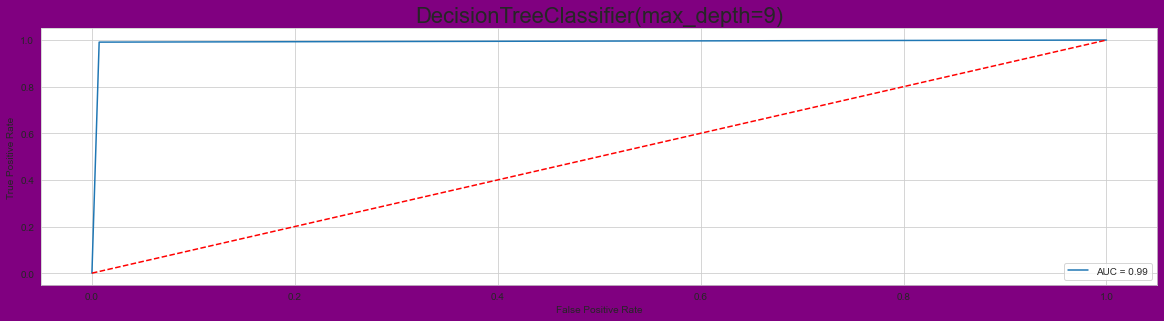

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       842
           1       0.99      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [39]:
PLT(Dc,x,y,80)

In [40]:
train_loss(Dc,x,y,80)

0.003231266348668993


In [41]:
from sklearn.ensemble import RandomForestClassifier


In [43]:
Rdc=RandomForestClassifier()
parameters={"n_estimators":range(1,1000,200)}
grd_rdc=GridSearchCV(Rdc,parameters,cv=5,scoring='f1')
grd_rdc.fit(x,y)
grd_rdc.best_params_

{'n_estimators': 401}

In [44]:
rdclf=RandomForestClassifier(n_estimators=401)
max_acc(rdclf,x,y)

F1 score  0.9974489795918366 coresponding to  42
F1 score  0.9968132568514977 coresponding to  43
F1 score  0.9987228607918263 coresponding to  44
F1 score  0.998085513720485 coresponding to  45
F1 score  1.0 coresponding to  46
F1 score  0.9961783439490446 coresponding to  47
F1 score  1.0 coresponding to  48
F1 score  0.9980830670926518 coresponding to  49
F1 score  0.9987228607918263 coresponding to  50
F1 score  0.9974457215836526 coresponding to  51
F1 score  0.9993618379068284 coresponding to  52
F1 score  0.9987244897959183 coresponding to  53
F1 score  0.9974457215836526 coresponding to  54
F1 score  0.998085513720485 coresponding to  55
F1 score  0.9993618379068284 coresponding to  56
F1 score  0.9987212276214833 coresponding to  57
F1 score  0.9961538461538463 coresponding to  58
F1 score  0.998085513720485 coresponding to  59
F1 score  0.9955442393380012 coresponding to  60
F1 score  0.9980830670926518 coresponding to  61
F1 score  0.9993610223642173 coresponding to  62
F1 s

In [46]:
#lets  check cross_val_score of the model
k(rdclf,x,y)

f1 score for  RandomForestClassifier(n_estimators=401) 0.8727577908566662
Standard deviation  in f1_score for  RandomForestClassifier(n_estimators=401) 0.1253431325688708

******************************************************
After seen the cross validation score of RandomForestClassifier(n_estimators=401) the cross_val_score  mean is 0.8727577908566662


1.0
roc_auc_score =  1.0
[[842   0]
 [  0 783]]






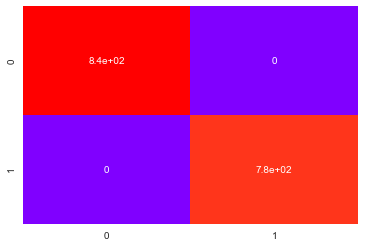

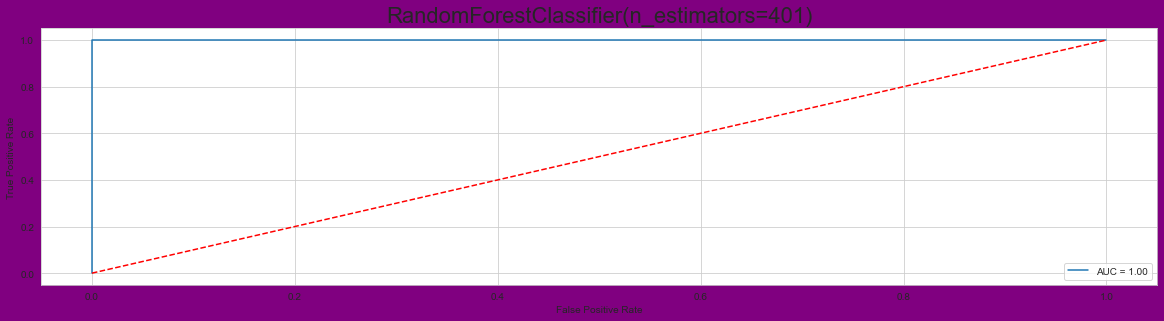

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [47]:
PLT(rdclf,x,y,46)

In [48]:
train_loss(rdclf,x,y,46)

0.0


In [49]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
max_acc(xgb,x,y)

F1 score  0.9974489795918366 coresponding to  42
F1 score  0.9980879541108987 coresponding to  43
F1 score  0.9974522292993631 coresponding to  44
F1 score  0.9955271565495207 coresponding to  45
F1 score  0.9980830670926518 coresponding to  46
F1 score  0.9942565411614551 coresponding to  47
F1 score  0.9993618379068284 coresponding to  48
F1 score  0.998085513720485 coresponding to  49
F1 score  0.9993610223642173 coresponding to  50
F1 score  0.9974489795918366 coresponding to  51
F1 score  0.9987244897959183 coresponding to  52
F1 score  0.9980879541108987 coresponding to  53
F1 score  0.9987228607918263 coresponding to  54
F1 score  0.9948914431673053 coresponding to  55
F1 score  0.9961685823754789 coresponding to  56
F1 score  1.0 coresponding to  57
F1 score  0.9961538461538463 coresponding to  58
F1 score  0.9980830670926518 coresponding to  59
F1 score  0.9974489795918366 coresponding to  60
F1 score  1.0 coresponding to  61
F1 score  1.0 coresponding to  62
F1 score  0.99426

In [50]:
#lets  check cross_val_score of the model
k(xgb,x,y)

f1 score for  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 0.8804114639087389
Standard deviation  in f1_score for  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints

1.0
roc_auc_score =  1.0
[[842   0]
 [  0 783]]






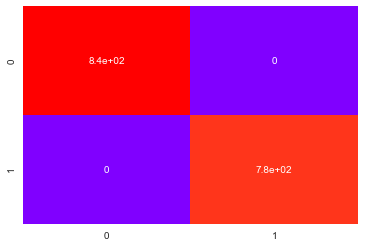

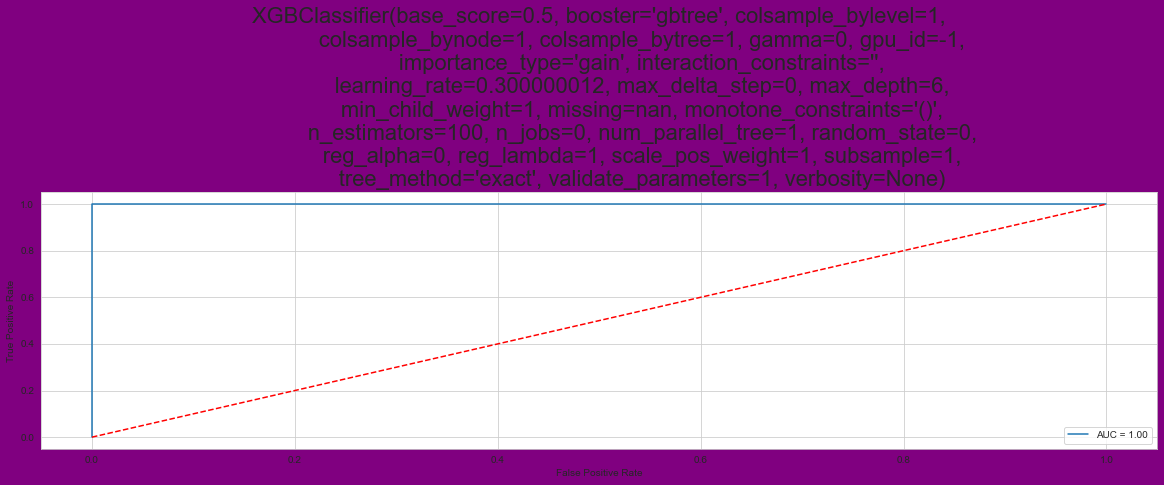

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [51]:
PLT(xgb,x,y,57)

In [52]:
train_loss(xgb,x,y,57)

0.0


In [53]:
from sklearn.svm import SVC 

In [54]:
svc=SVC()
parameters={"kernel":['linear','poly','rbf'],"C":[0.0001,0.001,0.01,0.1,1.0],
           }
grd_svc=GridSearchCV(svc,parameters,cv=5,scoring='f1')
grd_svc.fit(x,y)
grd_svc.best_params_

{'C': 1.0, 'kernel': 'rbf'}

In [55]:
svc=SVC(C=1.0,kernel="rbf")
max_acc(svc,x,y)

F1 score  0.9897039897039898 coresponding to  42
F1 score  0.9916506101477199 coresponding to  43
F1 score  0.9897304236200256 coresponding to  44
F1 score  0.9891095451633568 coresponding to  45
F1 score  0.9948717948717949 coresponding to  46
F1 score  0.9864777849323889 coresponding to  47
F1 score  0.9897039897039898 coresponding to  48
F1 score  0.986442866365397 coresponding to  49
F1 score  0.9916506101477199 coresponding to  50
F1 score  0.9916398713826367 coresponding to  51
F1 score  0.9897172236503855 coresponding to  52
F1 score  0.987765614938828 coresponding to  53
F1 score  0.9877498388136685 coresponding to  54
F1 score  0.990979381443299 coresponding to  55
F1 score  0.9896774193548387 coresponding to  56
F1 score  0.9896774193548387 coresponding to  57
F1 score  0.9864603481624759 coresponding to  58
F1 score  0.9903288201160542 coresponding to  59
F1 score  0.9852469531751123 coresponding to  60
F1 score  0.9923076923076923 coresponding to  61
F1 score  0.99228791773

In [56]:
k(svc,x,y)

f1 score for  SVC() 0.8542613865008232
Standard deviation  in f1_score for  SVC() 0.12803815087119344

******************************************************
After seen the cross validation score of SVC() the cross_val_score  mean is 0.8542613865008232


0.9948783610755442
roc_auc_score =  0.9949809339194219
[[840   2]
 [  6 777]]






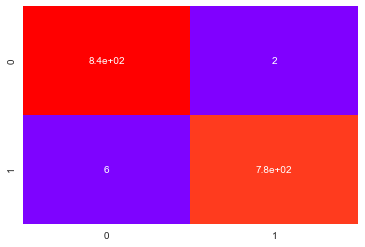

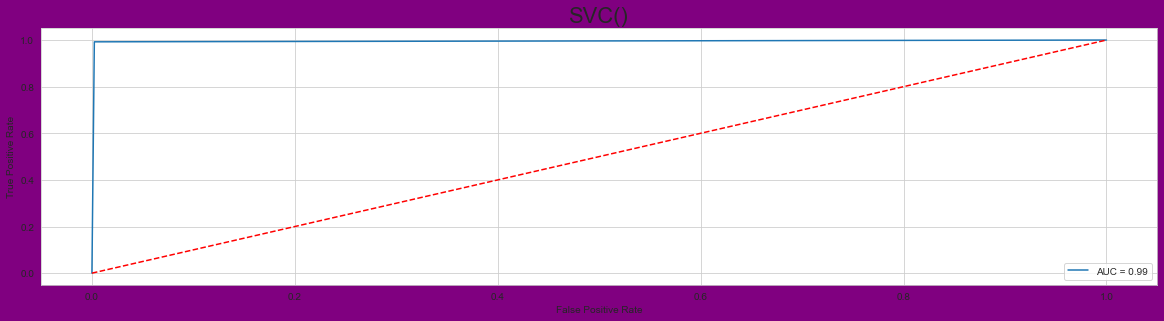

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       842
           1       1.00      0.99      0.99       783

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [57]:
PLT(svc,x,y,91)

In [58]:
train_loss(svc,x,y,91)

0.007231881827973519


In [61]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier()
parameters={"n_estimators":range(10,800,181)}
grd_bg=GridSearchCV(bg,parameters,cv=5,scoring="f1")
grd_bg.fit(x,y)
grd_bg.best_params_

{'n_estimators': 191}

In [62]:
Bag=BaggingClassifier(n_estimators=191)
max_acc(Bag,x,y)

F1 score  0.9929802169751116 coresponding to  42
F1 score  0.9891788669637174 coresponding to  43
F1 score  0.9968132568514977 coresponding to  44
F1 score  0.9923469387755103 coresponding to  45
F1 score  0.9923469387755103 coresponding to  46
F1 score  0.9891512444160816 coresponding to  47
F1 score  0.996173469387755 coresponding to  48
F1 score  0.9948914431673053 coresponding to  49
F1 score  0.9974391805377721 coresponding to  50
F1 score  0.9942784488239034 coresponding to  51
F1 score  0.9961685823754789 coresponding to  52
F1 score  0.9961636828644502 coresponding to  53
F1 score  0.9955385595920969 coresponding to  54
F1 score  0.9936305732484076 coresponding to  55
F1 score  0.9955385595920969 coresponding to  56
F1 score  0.9955271565495207 coresponding to  57
F1 score  0.9923175416133163 coresponding to  58
F1 score  0.9942565411614551 coresponding to  59
F1 score  0.9923371647509579 coresponding to  60
F1 score  0.9974489795918366 coresponding to  61
F1 score  0.997442455

In [63]:
k(Bag,x,y)

f1 score for  BaggingClassifier(n_estimators=191) 0.8993251044789325
Standard deviation  in f1_score for  BaggingClassifier(n_estimators=191) 0.10690042551256941

******************************************************
After seen the cross validation score of BaggingClassifier(n_estimators=191) the cross_val_score  mean is 0.8993251044789325


0.9974457215836526
roc_auc_score =  0.9975352123357694
[[840   2]
 [  2 781]]






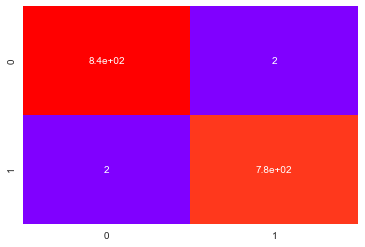

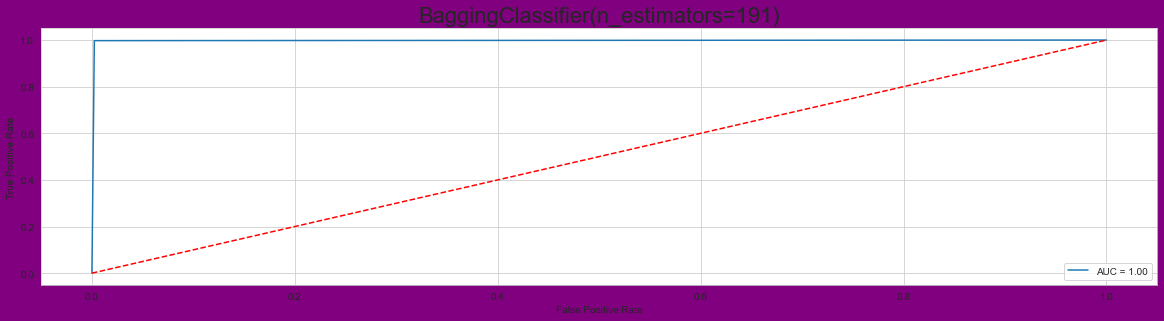

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [64]:
PLT(Bag,x,y,91)

In [65]:
train_loss(Bag,x,y,91)

0.0


In [71]:
Result=pd.DataFrame({"MODEL":rgr_n,"MOdel_F1_Score":f1_acc,"Random_State":f_rstate,"CV_Score":cvss,
                    "AUC_ROC":Roc_Auc,"Train_Loss_Score":trn_scr})

In [72]:
Result

,MODEL,MOdel_F1_Score,Random_State,CV_Score,AUC_ROC,Train_Loss_Score
0,LogisticRegression,0.833443,48,0.712850,0.843051,0.179104
1,KNeighborsClassifier,0.998723,82,0.878322,0.998768,0.001077
2,DecisionTreeClassifier,0.992337,80,0.891540,0.991967,0.003231
3,RandomForestClassifier,1.000000,46,0.872758,1.000000,0.000000
4,XGBClassifier,1.000000,57,0.880411,1.000000,0.000000
5,Support vector classifier,0.994878,91,0.854261,0.994981,0.007232
6,BaggingClassifier,0.998724,91,0.899325,0.997535,0.000000


In [73]:
#After seen the all performance am selecting the Bagging classifier as my Final mode with 91 Random State
#here Bagging Classifier is working good
Bag=BaggingClassifier(n_estimators=191)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=91,test_size=0.20,stratify=y)
Bag.fit(x_train,y_train)
y_prd=Bag.predict(x_test)
acc=accuracy_score(y_test,y_prd)
print("accuracy_score",acc*100)
print()
print()
print("CONFUSION_MATRIX OF BaggingClassifier  →","\n",confusion_matrix(y_test,y_prd))
print()
print("classification_reportOF BaggingClassifier"  ,"\n",
      classification_report(y_test,y_prd))

accuracy_score 99.87692307692308


CONFUSION_MATRIX OF BaggingClassifier  → 
 [[840   2]
 [  0 783]]

classification_reportOF BaggingClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [74]:
#saving the Model
import joblib #importing the job
  
# Save the model as a pickle in a file 
joblib.dump(Bag,'mushroom.pkl')

['mushroom.pkl']

In [75]:
#saving the predict as csv
joblib.dump(Bag,'mushroom.csv')

['mushroom.csv']

In [76]:
#lets call the model and predict it
Model=joblib.load('mushroom.csv')
Model.predict(x_test)

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)